In [6]:
# Import packages for statistical analysis
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [7]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [9]:
from bioinfokit.analys import stat

In [10]:
# import csv file
df = pd.read_csv("/Users/ruoxiyang/Downloads/diabetes.csv")
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [11]:
# It is noticeable that there are lots of zeros in variables Glucose, BloodPressure, SkinThickness, Insulin and BMI, which are inappropriate since it doesn’t make sense for the variables to be 0. 
# Replace 0 values in SkinThinkness with median 
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64             23        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             23        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [12]:
#replace 0 values in Insulin with median 
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [13]:
#replace 0 values in BMI with median 
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35     30.5  33.6   
1             1       85             66             29     30.5  26.6   
2             8      183             64             23     30.5  23.3   
3             1       89             66             23     94.0  28.1   
4             0      137             40             35    168.0  43.1   
5             5      116             74             23     30.5  25.6   
6             3       78             50             32     88.0  31.0   
7            10      115              0             23     30.5  35.3   
8             2      197             70             45    543.0  30.5   
9             8      125             96             23     30.5  32.0   
10            4      110             92             23     30.5  37.6   
11           10      168             74             23     30.5  38.0   
12           10      139             80             23     30.5  27.1   
13            1      189             60             23    846.0  30.1   
14            5      166             72             19    175.0  25.8   
15            7      100              0             23     30.5  30.0   
16            0      118             84             47    230.0  45.8   
17            7      107             74             23     30.5  29.6   
18            1      103             30             38     83.0  43.3   
19            1      115             70             30     96.0  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [14]:
# Replace 0 values in BloodPressure with median 
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [15]:
# Replace 0 values in Glucose with median 
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [16]:
# Then, unnecessary columns can be dropped and only variables of interest will remain in the dataset. In the current study, I am interested in exploring the effects of Diabetes Outcome and BMI on SkinThickness, therefore, the Pregnancies, Glucose, BloodPressure, Insulin columns were dropped from the dataset for more efficient analysis. BMI was converted into a categorical variable for ANOVA analysis.
to_drop = ['Insulin','Glucose','Pregnancies','BloodPressure','DiabetesPedigreeFunction','Age']
df.drop(columns=to_drop, inplace=True,axis=1)
df.head()


SkinThickness   BMI  Outcome
0             35  33.6        1
1             29  26.6        0
2             23  23.3        1
3             23  28.1        0
4             35  43.1        1

In [17]:
# In the current study, I am interested in exploring the effects of Diabetes Outcome and BMI on SkinThickness, therefore, the Pregnancies, Glucose, BloodPressure, Insulin columns were dropped from the dataset for more efficient analysis. BMI was converted into a categorical variable for ANOVA analysis. 
# If the patient’s BMI is lower than 18.5, the values will be replaced by class 1; BMI values between 18.5 and 25 were replaced with class 2 and it is a healthy weight range; if the patient’s BMI is above 25, the values will be replaced by 3 and it falls in the obesity range (Steinberger et al., 2005). 
# Healthy BMI is represented as class 2; underweight BMI is indicated by class 1; overweight BMI is shown as class 3. 
df1=df.copy()

df1['BMI'] = np.where(df1['BMI'].between(18.5,25), 2, df1['BMI'])
df1['BMI'] = np.where(df1['BMI'] == 18.2, 1, df1['BMI'])
df1['BMI'] = np.where(df1['BMI'] == 18.4, 1, df1['BMI'])
df1['BMI'] = np.where(df1['BMI'] >25, 3, df1['BMI'])


df1.head(20)

SkinThickness  BMI  Outcome
0              35  3.0        1
1              29  3.0        0
2              23  2.0        1
3              23  3.0        0
4              35  3.0        1
5              23  3.0        0
6              32  3.0        1
7              23  3.0        0
8              45  3.0        1
9              23  3.0        1
10             23  3.0        0
11             23  3.0        1
12             23  3.0        0
13             23  3.0        1
14             19  3.0        1
15             23  3.0        1
16             47  3.0        1
17             23  3.0        1
18             38  3.0        0
19             30  3.0        1

In [18]:
# Hypothesis: Test the effect of diabetes and BMI to skin thickness 

# Split the dataframe based on outcome value 
df_outcome0 = df1[df1['Outcome']==0]
df_outcome1=df1[df1['Outcome']==1]


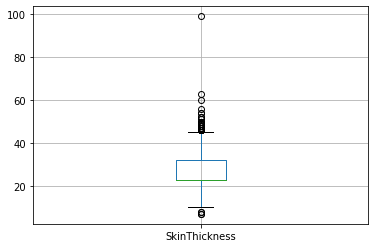

In [19]:
# The boxplot of skin thickness was firstly produced to give an overview of the skin thickness values of patients in the dataset. The median value is about 23 while there are a lot of outliers. 
SkinThicknessboxplot_1 = df1.boxplot(column=['SkinThickness'])

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

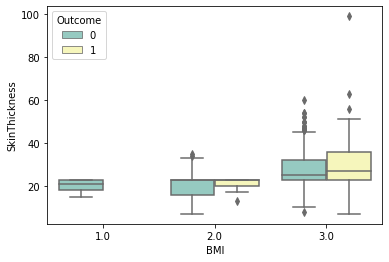

In [20]:
# I also created another exploratory visualization with a boxplot using the hue parameter. In the plot, the first categorical variable is BMI level, and the diabetes outcome is the parameter while it is also a second categorical variable.
# The boxplot helps break out the data by a second categorical data and the different diabetes outcomes appear as different boxes with different colours. We can see the changes and differences in skin thickness in response to different levels of BMI and diabetes outcomes. It is noticeable that as BMI level rose, the skin thickness increased as well. 
sns.boxplot(x="BMI", y="SkinThickness", hue="Outcome", data=df1, palette="Set3")

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

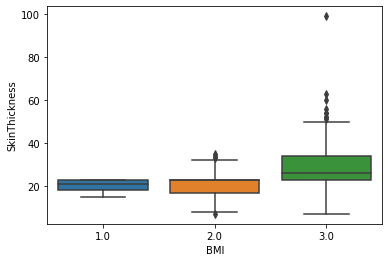

In [21]:
# I also constructed two boxplots to provide better visualizations in comparing groups in BMI and diabetes outcomes respectively and viewing dispersion and spread in data. 
sns.boxplot(data = df1, x='BMI', y='SkinThickness')

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

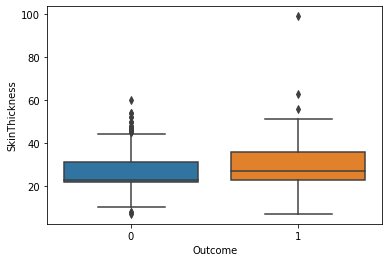

In [22]:
sns.boxplot(data = df1, x='Outcome', y='SkinThickness')

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

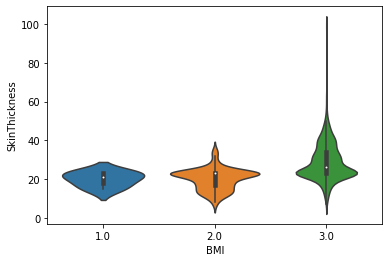

In [23]:
# The violin plot is a hybrid of a box plot and a kernel density plot as it visualizes the distribution of the numerical data as well as the peak value. 
# The violin plot of BMI and skin thickness was also created to give more details on the underlying data. 
# As a result, we can compare the difference in skin thickness in response to different BMI levels and diabetes outcomes as well as explore the relationship between BMI, diabetes outcome and skin thickness. We can see that the skin thickness increased as the BMI level rose.  
sns.violinplot(data = df1, x='BMI', y='SkinThickness')

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

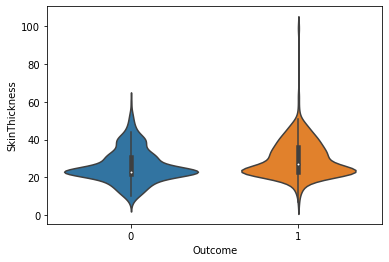

In [24]:
# The other violin plot of diabetes outcome and skin thickness was also produced to show the relationship between diabetes condition to skin thickness. 
sns.violinplot(data = df1, x='Outcome', y='SkinThickness')

In [25]:
SkinThickness_Outcome0= df_outcome0['SkinThickness'].values.tolist()
SkinThickness_Outcome1= df_outcome1['SkinThickness'].values.tolist()


In [26]:
# The research question is to explore the relationship between BMI, diabetes conditions and skin thickness or to test the relationship between BMI and skin thickness condition depending on the diabetes outcome.
# independent sample t test
# The initial hypothesis for the study is that there is no relationship between BMI, diabetes outcome and skin thickness. The population means of the first factor BMI are equal. The population means of the second factor diabetes outcome are equal. There is no interaction between the two factors.
# t test hypothesis: 
# The null hypothesis for the t-test is that there is no difference in skin thickness between the population who has diabetes and the healthy population. The alternative hypothesis is that there is a significant difference between the two populations. 


Text(0.5, 1.0, 'Independent Sample T-Test')

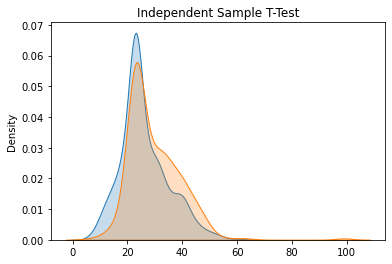

In [27]:
sns.kdeplot(SkinThickness_Outcome0, shade=True)
sns.kdeplot(SkinThickness_Outcome1, shade=True)
plt.title("Independent Sample T-Test")

In [28]:
tStat, pValue = stats.ttest_ind(SkinThickness_Outcome0, SkinThickness_Outcome1, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
# An independent sample t-test was plotted using Kdeplot, which depicts the probability density function of the continuous data variables, which is skin thickness in this case. Then, I used stats.ttest to perform the t-test. As a result, the p-value is 3.47e-07, which is lower than 0.05. the t -statistics is -5.17. We can interpret that the null hypothesis is rejected and there is a significant difference in the skin thickness between the populations with diabetes and healthy population

P-Value:3.4773163050393875e-07 T-Statistic:-5.165110346789645


In [29]:
# Null hypothesis: there is no relationship between BMI, Diabetes Outcome and SkinThickness. In multiple linear regression analysis, x variables are BMI and outcome, and the y variable is SkinThickness. 
# multiple linear regression
X = df1[['BMI','Outcome']]
y = df1['SkinThickness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [30]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df
# As a result, the coefficient of BMI is 7.34 while the coefficient of Outcome is 1.91. We can interpret that the positive effect of BMI on skin thickness is significantly greater than the effect of diabetes outcome. 

Coefficient
BMI         7.335380
Outcome     1.910761

In [31]:
y_pred = regressor.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

Actual  Predicted
661      43  29.787386
122      30  27.876625
113      23  27.876625
14       19  29.787386
529      23  20.541244
..      ...        ...
476      45  29.787386
482      22  27.876625
230      23  29.787386
527      15  27.876625
380      30  27.876625

[154 rows x 2 columns]

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# “regressor.predict” was also used to predict values and now we can compare the actual output values for x-test with the predicted values. 

Mean Absolute Error: 6.8800247381700546
Mean Squared Error: 69.18462836373939
Root Mean Squared Error: 8.317729760201361


In [57]:
# We use OLS multiple linear regression to check how the mean of skin thickness is affected by BMI level and diabetes outcome

model = ols('SkinThickness ~ C(Outcome) + C(BMI) + C(Outcome):C(BMI)', data=df1).fit()
model.summary()

# As a result, the 95% confidence interval for intercept is (11.469,28.531), the standard deviation is 4.346, and the p value is 0.000.
# As a result, the 95% confidence interval for diabetes outcome is (-1.285,3.253), the standard deviation is 1.156, and the p value is 0.395.
# The R-squared value is 0.118, which indicates that 11.8% variation in skin thickness can be explained by diabetes outcome
# The parameter estimation for Intercept, Outcome[T.1], BMI[T.2.0], BMI[T3.0],Outcome:BMI[T.2.0], and Outcome[T.1]:BMI[T3.0] are 20, 0.9841,0.0693.7.6506,-0.3391, and 1.3232 respectively

# We can conclude that both BMI and diabates outcome have positive impact on skin thickness
# However, BMI has greater influence on the skin thickness than diabetes outcome
# To be more specific, obesity has greater impact on skin thickness than other BMI levels

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SkinThickness   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     25.44
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           8.24e-20
Time:                        11:31:26   Log-Likelihood:                -2747.9
No. Observations:                 768   AIC:                             5506.
Df Residuals:                     763   BIC:                             5529.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        20.0000      4.346      4.602      0.000      11.469      28.531
C(Outcome)[T.1]                   0.9841      1.156      0.851      0.395      -1.285       3.253
C(BMI)[T.2.0]                     0.0693      4.431      0.016      0.988      -8.629       8.768
C(BMI)[T.3.0]                     7.6506      4.368      1.752      0.080      -0.924      16.225
C(Outcome)[T.1]:C(BMI)[T.2.0]    -0.3391      2.276     -0.149      0.882      -4.808       4.130
C(Outcome)[T.1]:C(BMI)[T.3.0]     1.3232      1.223      1.082      0.280      -1.078       3.724
==============================================================================
Omnibus:                      223.070   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1065.364
Skew:                           1.245   Prob(JB):                    4.56e-232
Kurtosis:                       8.205   Cond. No.                     7.31e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
# Two way ANOVA
# Null hypothesis: The population means of the first factor BMI are equal. The population means of the second factor diabetes outcome are equal. There is no interaction between the two factors. 
# The ANOVA table was constructed that included information such as degrees of freedom, sum of squares, mean squares, F value and p-value of the f statistics. 
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# According to the summary table, the p values for outcome and BMI are 1.00e-03 and 2.003e-16 respectively, which were lower than 0.05. Therefore, the null hypothesis is rejected. The population means of BMI and diabetes conditions were not equal. 

sum_sq     df             F        PR(>F)
C(Outcome)         2.285724e-11    1.0  3.025675e-13  9.999995e-01
C(BMI)             6.849419e+03    2.0  4.533382e+01  2.491311e-19
C(Outcome):C(BMI)  8.393126e+02    2.0  5.555105e+00  4.025729e-03
Residual           5.764027e+04  763.0           NaN           NaN

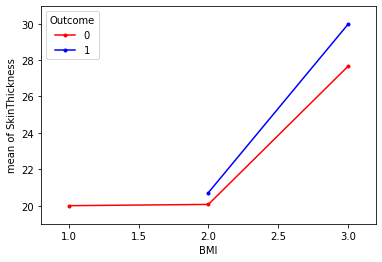

In [34]:
# An interaction plot was constructed to help visualize the relationship between one categorical factor and a continuous response depending on the value of the second categorical factor. 
# Interaction plot
fig = interaction_plot(x=df1['BMI'], trace=df1['Outcome'], response=df1['SkinThickness'], 
    colors=['red','blue'])
plt.show()
# From the interaction plot, the interaction effect is significant between BMI and diabetes outcome because the two lines are not parallel. The interaction effect indicates that the relationship between BMI and skin thickness depends on the value of diabetes outcomes. From this output, we can see that both BMI and diabetes outcomes explain a significant amount of variation in skin thickness.  

In [35]:
# Post hoc for main effect BMI
# Now, we know that BMI and diabetes outcomes are statistically significant, but ANOVA does not specify which BMI and outcome are significantly different from each other. To better analyze the pairs of significantly different BMI and outcomes, pairwise comparison or post hoc comparison analysis was performed for main effects BMI and Outcome respectively using Tukey’s HSD test. 
# The test revealed significant pairwise difference between BMI class 3 and class 2 since the p value is 0.001. The Tuckey’s HSD test also indicated significant pairwise difference between diabetes outcome 1 and outcome 0.
res = stat()
res.tukey_hsd(df=df1, res_var='SkinThickness', xfac_var='BMI', anova_model='SkinThickness~C(BMI)+C(Outcome)+C(BMI):C(Outcome)')
res.tukey_summary
# In the result of interaction effect analysis between BMI and Outcome, there are significant pairwise differences between (BMI 3.0, Outcome 1) and (BMI 3.0, Outcome 0), and between (BMI 3.0, Outcome 1) and (BMI 2.0, Outcome 0) as the p-values (0.01) (0.001) are lower than 0.05 and indicate statistically significant difference. 

group1  group2      Diff      Lower      Upper    q-value   p-value
0     3.0     2.0  8.457486   6.337924  10.577049  13.251734  0.001000
1     3.0     1.0  8.568598  -1.667949  18.805144   2.779931  0.121635
2     2.0     1.0  0.111111 -10.281641  10.503863   0.035506  0.900000

In [36]:
# Post hoc for main effect Outcome
res = stat()
res.tukey_hsd(df=df1, res_var='SkinThickness', xfac_var='Outcome', anova_model='SkinThickness~C(BMI)+C(Outcome)+C(BMI):C(Outcome)')
res.tukey_summary

group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  3.658418  2.366704  4.950132  7.862839    0.001

In [37]:
#Interaction effect between BMI and Outcome
res.tukey_hsd(df=df1, res_var='SkinThickness', xfac_var=['BMI','Outcome'], anova_model='SkinThickness ~ C(BMI) + C(Outcome) + C(BMI):C(Outcome)')
res.tukey_summary.head()

/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:862: RuntimeWarning: divide by zero encountered in true_divide
  mse_factor = np.sqrt(np.divide(mse, group1_count) + np.divide(mse, group2_count))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:870: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, group2_count)))))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:873: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, group2_count)))))
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:869: RuntimeWarning: divide by zero encountered in true_divide
  (np.divide(1, group1_count) +
/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:872: RuntimeWarning: divide by zero encountered in true_divide
  (np.divide(1, group1_count) +



NaN result encountered.

NaN result encountered.

NaN result encountered.


group1    group2      Diff     Lower      Upper    q-value   p-value
0  (3.0, 1)  (3.0, 0)  2.307221  0.326441   4.288002   4.706201  0.011775
1  (3.0, 1)  (2.0, 1)  9.243569 -0.266886  18.754024   3.926954  0.062434
2  (3.0, 1)  (2.0, 0)  9.888547  6.978658  12.798437  13.730092  0.001000
3  (3.0, 1)  (1.0, 1)  0.000000      -inf        inf   0.000000  0.900000
4  (3.0, 1)  (1.0, 0)  9.957854 -2.552680  22.468389   3.215936  0.205957

In [38]:
from pingouin import ancova

In [46]:
# Perform ANCOVA analysis
# Null hypothesis: The diabetes results/outcome and skin thickness are not related if we hold BMI constant. The BMI and skin thickness are not related.
# Parameters: The dataframe is df, where BMI is continuous variable. dv is the dependent variable, covar is the data wih the covariate, between is the data with the between factor. 
# ANCOVA evaluates whether the means of skin thickness are eqaul across levels of a categorical variable BMI often called a treatment, while statistically controlling for the effects of other continuous variables that are not of primary interest, which is BMI.
ancova(data=df,dv='SkinThickness',covar='BMI',between='Outcome')
# As a result, we see the p-value(p-unc) for outcome is 5.25e-1. Since this value is less than 0.05, we can reject the null hypothesis that each of the diabete outcome leads to same average skin thickness, even after accounting for BMI, and conclude that diabetes outcome is significant in BMI level. 
# Also, the p-value for for the BMI variable tests the null hypothesis that BMI and skin thickness are not related. Since it is below 0.05 (4.46e-55), we reject the null hypothesis, and concluded that BMI is signficiant in predicting skin thickness. 

Source            SS   DF           F         p-unc       np2
0   Outcome     24.189626    1    0.404383  5.250247e-01  0.000528
1       BMI  17232.506274    1  288.079206  4.457622e-55  0.273559
2  Residual  45761.259487  765         NaN           NaN       NaN

In [41]:
pip install plotly

     |████████████████████████████████| 28.8 MB 494 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [42]:

#statistical power example
import numpy as np
import pandas as pd

from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()



In [43]:
# Parameters for the analysis 

effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))# parameters for the analysis 

# The example calculates and prints the estimated number of samples for the experiment as 25.52/26, this would be a suggested minimum number of samples required to see an effect of the desired size

Required sample size: 25.52
Required sample size: 25.52
Required sample size: 25.52


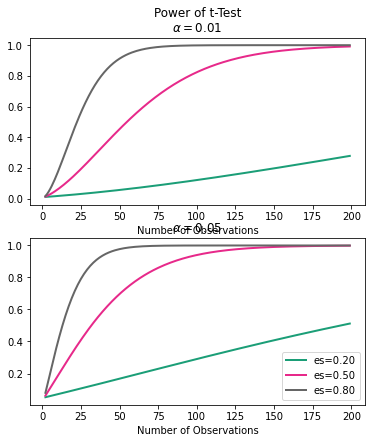

In [47]:
# Power vs. number of observations 
# We use the plot_power() function to create power curves
# The power curve below shows how the change in sample size impact the power of the statistical test.
# 0.2,0.5,0.8 were chosen as effect size values, which correspond to the thresholds for small, medium and large
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()

ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)
# The plots show the impact on statistical power for three different effect size as the sample size is increased.
# We can see that there is a large effect that a point of diminishing returns in terms of statistical power occurs at around 50 to 70 observations.
# Therefore, we can infer that  an increase in the sample size leads to an increase in power. In other words, the bigger the sample size, the higher the power, keeping other parameters constant. 
# # In this case, greater sample size leads to increasing power and lower probability of Type II error. 

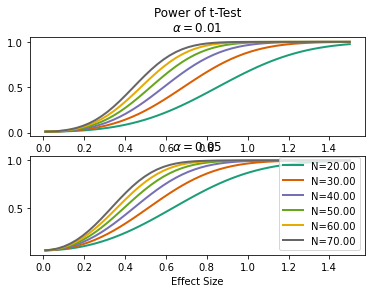

In [52]:
#Power vs effect size 
# Plot power with effect size 
# The power curve below shows how the change in effect size impact the power of the statistical test.
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='effect_size',
                                 nobs= np.array([20,30,40,50,60,70]),
                                 effect_size=np.linspace(0.01, 1.5),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()

ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='effect_size',
                                 nobs= np.array([20,30,40,50,60,70]),
                                 effect_size=np.linspace(0.01, 1.5),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')
# From the plots, we can infer that an increase in the effect size leads to an increase in power. In other words, the bigger the effect size, the higher the power, keeping other parameters constant. 
# we can infer that  an increase in the effect size leads to an increase in power. In other words, the bigger the effect size, the higher the power, keeping other parameters constant. 
# As a result, higher statistical power means lower probability of committing a Type II error. It also means a higher probability of detecting effect when there is an effect to detect true positive.
# In this case, higher effect size leads to increasing power and lower probability of Type II error. 


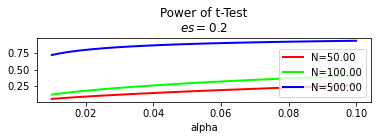

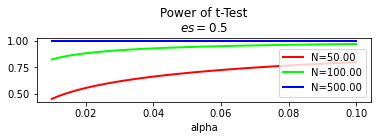

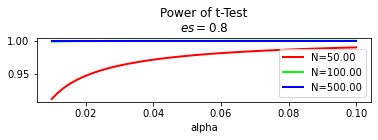

In [53]:
# Power vs significance level
# The power curve below shows how the change in significance level impact the power of the statistical test.
# 0.2,0.5,0.8 were chosen as effect size values, which correspond to the thresholds for small, medium and large
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 nobs= np.array([50, 100, 500]),
                                 effect_size=0.2,
                                 alpha=np.linspace(0.01, 0.1),
                                 ax=ax, title='Power of t-Test' + '\n' + r'$es=0.2$')
fig = plt.figure()
ax = fig.add_subplot(3,1,2)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 nobs= np.array([50, 100, 500]),
                                 effect_size=0.5,
                                 alpha=np.linspace(0.01, 0.1),
                                 ax=ax, title='Power of t-Test' + '\n' + r'$es=0.5$')
fig = plt.figure()
ax = fig.add_subplot(3,1,3)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 nobs= np.array([50, 100, 500]),
                                 effect_size=0.8,
                                 alpha=np.linspace(0.01, 0.1),
                                 ax=ax, title='Power of t-Test' + '\n' + r'$es=0.8$')
# From the plots, we can infer that an increase in the significance level leads to an increase in power. In other words, the bigger the significance level, the higher the power, keeping other parameters constant. 
# We can infer that an increase in the level of significance will lead to an increase in power.
# In this case, higher significance level leads to increasing power and lower probability of Type II error. 


In [ ]:
# Reference: Steinberger, J. et al., 2005. Comparison of body fatness measurements by BMI and skinfolds vs dual energy X-ray absorptiometry and their relation to cardiovascular risk factors in adolescents. Int. J. Obes., 29(11), pp.1346–1352.